# Data Classification Project using the MAGIC Gamma Telescope Dataset.

## Data Set Information:
MAGIC Gamma Telescope Dataset: Donated on 4/30/2007
Creators: R. Bock

Source: [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope)

Description: The data set was generated by a Monte Carlo program, Corsika, described in:
    D. Heck et al., CORSIKA, A Monte Carlo code to simulate extensive air showers,
    Forschungszentrum Karlsruhe FZKA 6019 (1998).
http://rexa.info/paper?id=ac6e674e9af20979b23d3ed4521f1570765e8d68


DOI: 10.24432/C52C8B
License: This dataset is licensed under a Creative Commons Attribution 4.0 International (CC BY 4.0) license. This allows for the sharing and adaptation of the datasets for any purpose, provided that the appropriate credit is given.




### Column Descriptions:
* fLength:	
    * type = Continuous
    * Description=  major axis of ellipse
    * units = mm
* fWidth:	
    * type = Continuous
    * Description =  minor axis of ellipse
    * units = mm
* fSize:	
    * type = Continuous
    * Description =  10-log of sum of content of all pixels
    * units = #phot
* fConc:	
    * type = Continuous
    * Description =  ratio of sum of two highest pixels over fSize
* fConc1:	
    * type = Continuous
    * Description =  ratio of highest pixel over fSize
* fAsym:	
    * type = Continuous
    * Description =  distance from highest pixel to center, projected onto major axis
* fM3Long:	type = Continuous
    * Description =  3rd root of third moment along major axis
    * units = mm
* fM3Trans:	type = Continuous
    * Description =  3rd root of third moment along minor axis
    * units = mm
* fAlpha:	type = Continuous
    * Description =  angle of major axis with vector to origin
    * units = deg
* fDist:	type = Continuous
    * Description =  distance from origin to center of ellipse
    * units = mm
* class:	type = Binary/ Categorical
    * Description =  gamma (signal), hadron (background)

## Objective:   
Use features to classify recordings from observations into primary gamma signals and background cosmic ray-induced showers. 

### Discrimination Factors:
* Shape and orientation of the shower image.
* Asymmetry along the major axis.
* Cluster extent in the image plane.
* Total sum of energy depositions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
columns = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df = pd.read_csv(r"C:\Users\AtangAgamaH\Downloads\magic+gamma+telescope\magic04.data", names=columns)

In [3]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [4]:
df.describe()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  class     19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


In [6]:
df['class'].value_counts()

class
g    12332
h     6688
Name: count, dtype: int64

In [7]:
df['class']=[1 if i=="g" else 0 for i in df['class']]

In [8]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  class     19020 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 1.6 MB


array([[<Axes: title={'center': 'fLength'}>,
        <Axes: title={'center': 'fWidth'}>,
        <Axes: title={'center': 'fSize'}>],
       [<Axes: title={'center': 'fConc'}>,
        <Axes: title={'center': 'fConc1'}>,
        <Axes: title={'center': 'fAsym'}>],
       [<Axes: title={'center': 'fM3Long'}>,
        <Axes: title={'center': 'fM3Trans'}>,
        <Axes: title={'center': 'fAlpha'}>],
       [<Axes: title={'center': 'fDist'}>,
        <Axes: title={'center': 'class'}>, <Axes: >]], dtype=object)

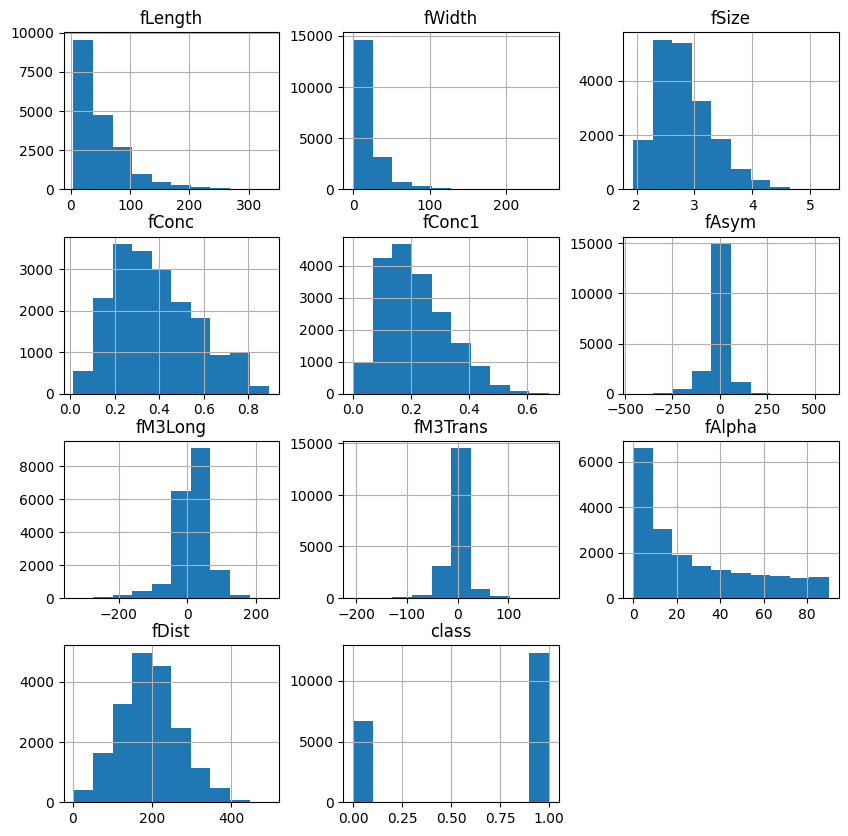

In [10]:
df.hist(figsize=(10,10))

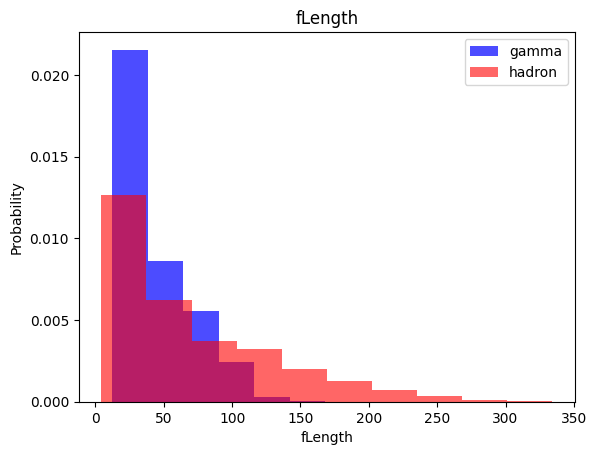

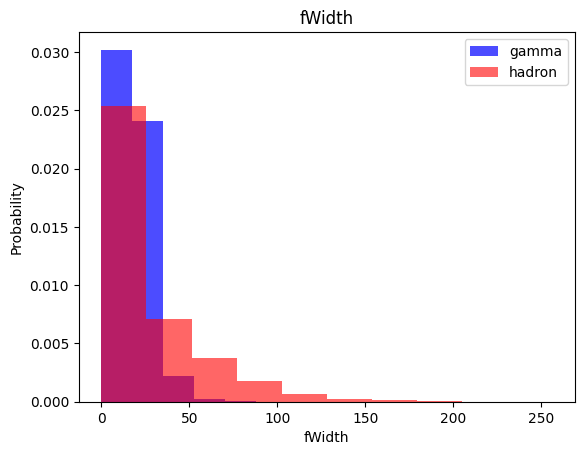

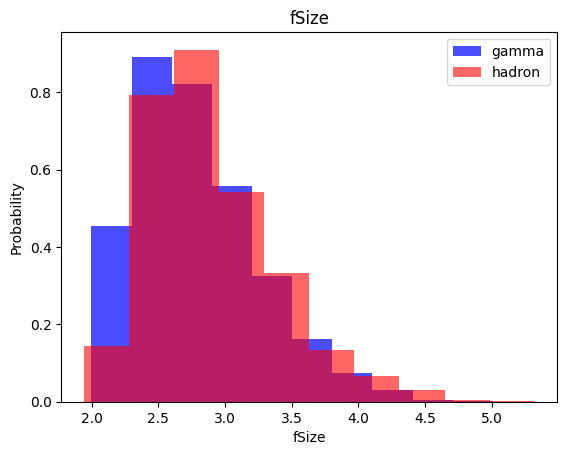

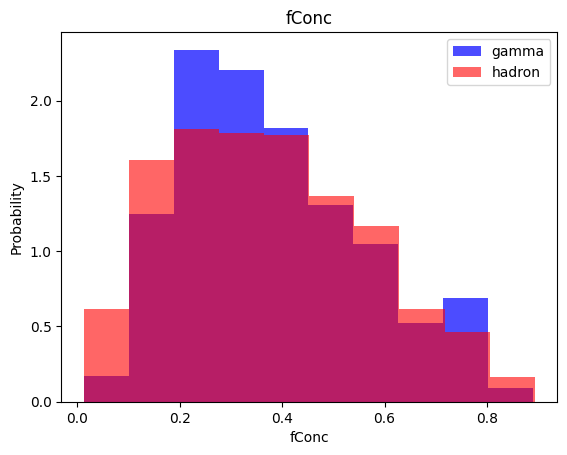

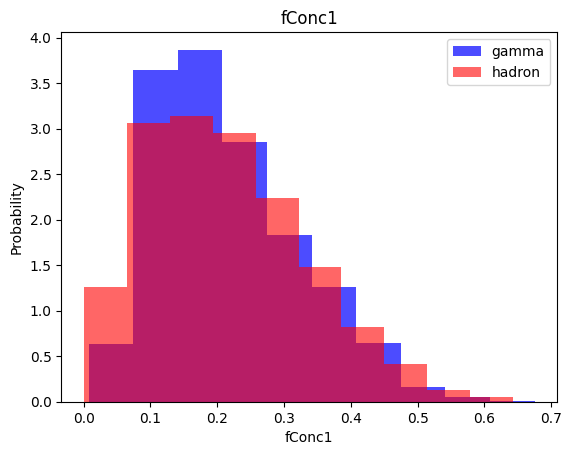

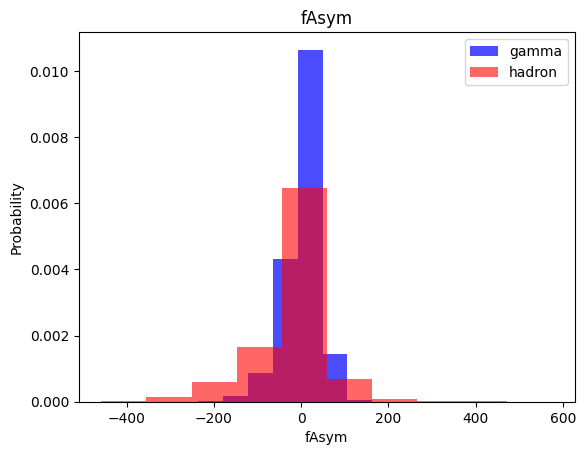

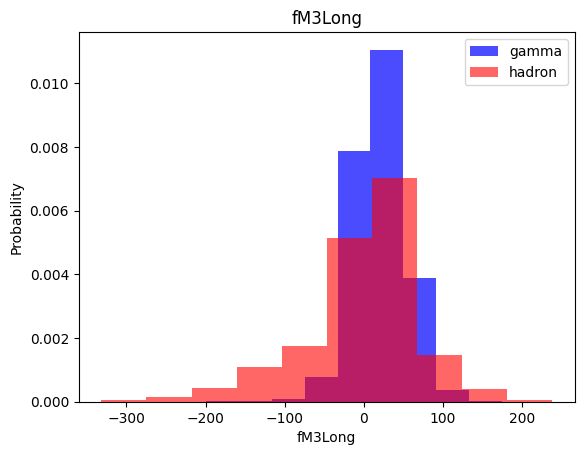

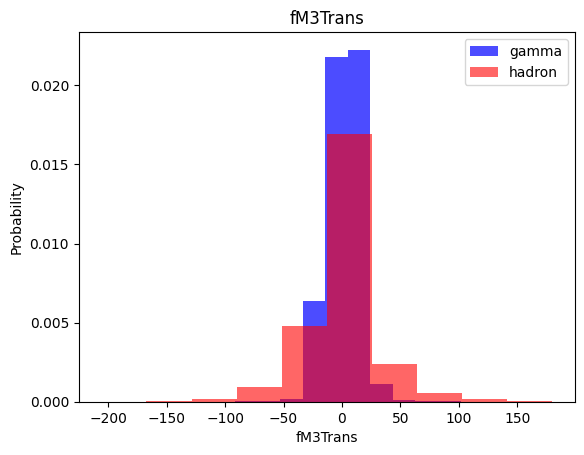

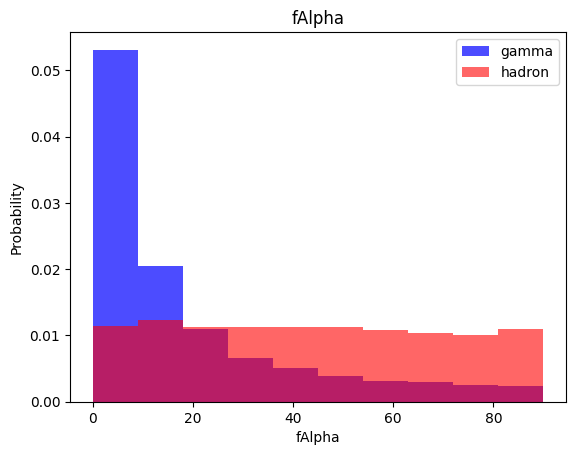

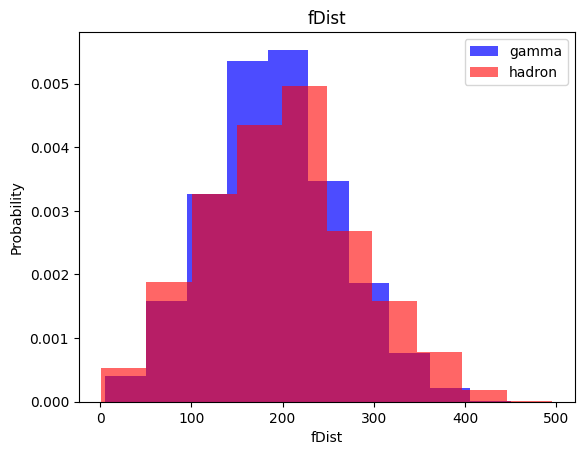

In [11]:
for c in columns[:-1]:
    plt.hist(df[df['class']==1][c], color='blue', label='gamma', alpha=0.7, density=True)
    plt.hist(df[df['class']==0][c], color='red', label='hadron', alpha=0.6, density=True)
    plt.title(c)
    plt.ylabel('Probability')
    plt.xlabel(c)
    plt.legend()
    plt.show()

Train, Validation and Test Data Sets

In [12]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

C:\Users\AtangAgamaH\AppData\Roaming\Python\Python312\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [13]:
print(len(train[train['class']==1]))
print(len(train[train['class']==0]))

7439
3973


In [14]:
X = df.drop(columns=['class'])
y =df['class']

In [15]:
X.head(20)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620
5,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980
6,48.2468,17.3565,3.0332,0.2529,0.1515,8.5730,38.0957,10.5868,4.7920,219.0870
7,26.7897,13.7595,2.5521,0.4236,0.2174,29.6339,20.4560,-2.9292,0.8120,237.1340
8,96.2327,46.5165,4.1540,0.0779,0.0390,110.3550,85.0486,43.1844,4.8540,248.2260
9,46.7619,15.1993,2.5786,0.3377,0.1913,24.7548,43.8771,-6.6812,7.8750,102.2510


In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
dtypes: float64(10)
memory usage: 1.5 MB


In [17]:
from imblearn.over_sampling import RandomOverSampler

In [18]:
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X,y)
    data = np.hstack((X, np.reshape(y, (-1,1))))
    return data, X, y

scaler = StandardScaler()
X=scaler.fit_transform(X)

X

columns_without_class = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']

X = pd.DataFrame(X, columns=columns_without_class)

In [19]:
X.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620


In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
dtypes: float64(10)
memory usage: 1.5 MB


In [21]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)